In [2]:
"""결정트리"""


In [329]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_dt = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dt.data, iris_dt.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [11]:
"""시각화
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_dt.target_names, feature_names = iris_dt.feature_names, impurity=True
               , filled=True)

In [33]:
"""import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
#189p 시각화하려면 먼가 다운 받아야 하는듯

ModuleNotFoundError: No module named 'graphviz'

In [40]:
# feature_names는 피처 이름이지만 target_names은 피처명이 아님. 0,1,2를 의미하는 꽃 종류,,
#.data ==.target == 150개임
print(iris_dt.feature_names,'\n',iris_dt.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 ['setosa' 'versicolor' 'virginica']


[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

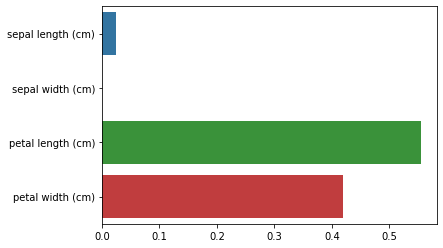

In [331]:
import seaborn as sns
import numpy as np
%matplotlib inline
#피처별 중요도 -- 트리 정의할 때 random_state에 따라 다 다르게 나옴
print(np.round(dt_clf.feature_importances_, 3))

#피처별 중요도 매핑
for name, value in zip(iris_dt.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

#시각화
sns.barplot(x=dt_clf.feature_importances_, y= iris_dt.feature_names)

In [50]:
#결정 트리 과적합

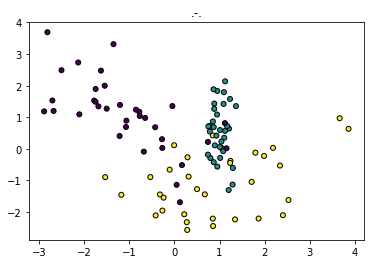

In [332]:
#2개의 피처가 3가지 유형의 클래스 값을 가지는
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('.-.')
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, 
                                          n_clusters_per_class=1, random_state=0)
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [103]:
"""199~200p 어떤 식으로 결정 트리가 데이터를 구분하는지 도식화"""

'199~200p 어떤 식으로 결정 트리가 데이터를 구분하는지 도식화'

In [333]:
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=155, max_depth= 3)

iris_dt = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dt.data, iris_dt.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
acc = accuracy_score(y_test, pred) #깊이가 2,3,4 일떄 ㄱ. 숫자가 너무 커져도 정확도 떨어짐
acc

0.9333333333333333

In [ ]:
"""<<앙상블>> : 보팅 / 배깅(부트스트래핑) / 부스팅"""

In [ ]:
#보팅 방식 --> 여러개 분류기

In [334]:
#유방암 예측 - 보팅 방식의 앙상블
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [335]:
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)],  voting= 'soft')
# split 시 꼭 데이터프레임 형태의 데이터 아니어도 됨. 타겟도 DF에 추가하지 않고 바로 가능
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size= 0.2, random_state= 156)

#예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도:", accuracy_score(y_test, pred))

clfs =[lr_clf, knn_clf]
for clf in clfs:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(clf.__class__.__name__ , "정확도: " , accuracy_score(y_test, pred))
    #print(pred)

Voting 분류기 정확도: 0.956140350877193
LogisticRegression 정확도:  0.9473684210526315
KNeighborsClassifier 정확도:  0.9385964912280702


In [336]:
#test -로지스틱회귀               이해: 로지스틱은 원래 이진분류이며, 선 1개로 위쪽과 아래쪽으로, 3중분류는 선 3개로 6구역을 나눔
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size= 0.2, random_state= 156)
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict_proba(X_test) #로지스틱 회귀는 원래 결과를 확률값으로 예측
np.round(pred,3)

array([[0.087, 0.913],
       [1.   , 0.   ],
       [0.157, 0.843],
       [0.996, 0.004],
       [0.05 , 0.95 ],
       [0.004, 0.996],
       [0.   , 1.   ],
       [0.001, 0.999],
       [0.01 , 0.99 ],
       [1.   , 0.   ],
       [0.997, 0.003],
       [0.999, 0.001],
       [0.002, 0.998],
       [0.005, 0.995],
       [0.009, 0.991],
       [0.006, 0.994],
       [0.117, 0.883],
       [0.001, 0.999],
       [0.001, 0.999],
       [0.006, 0.994],
       [0.999, 0.001],
       [0.086, 0.914],
       [1.   , 0.   ],
       [0.002, 0.998],
       [0.999, 0.001],
       [0.189, 0.811],
       [0.601, 0.399],
       [0.992, 0.008],
       [0.003, 0.997],
       [0.995, 0.005],
       [0.168, 0.832],
       [0.971, 0.029],
       [0.198, 0.802],
       [0.007, 0.993],
       [0.886, 0.114],
       [0.997, 0.003],
       [0.011, 0.989],
       [0.005, 0.995],
       [0.89 , 0.11 ],
       [0.001, 0.999],
       [0.729, 0.271],
       [0.001, 0.999],
       [0.066, 0.934],
       [0.0

In [105]:
#배깅 = 부트스트랩 어그레게이팅의 준말 == "여러 데이터셋을 중첩되게 분할" 후 각 샘플에 결정트리 적용

In [337]:
# 랜덤 포레스트 실습 [데이터는 책과 달리 그냥 유방암 그대로 사용]
    #랜덤 포레스트는 다중 분류 가능
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size= 0.2, random_state=0)
rf_clf = RandomForestClassifier(random_state=0, max_depth=8) #조건: n_estimator는 샘플링 수이므로 트리의 개수, depth는 트리의 깊이 
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print('랜덤포레스트정확도:', acc)

랜덤포레스트정확도: 0.9649122807017544


In [126]:
#랜덤 포레스트 하이퍼 파라미터 튜닝 - GridSearchCV 사용
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8,16,24],
    'min_samples_leaf' : [1,6,12],
    'min_samples_split' : [2,8,16]
}
rf_clf = RandomForestClassifier(n_estimators=30, random_state=0, n_jobs= -1)
grid_cv =GridSearchCV(rf_clf, param_grid=params , cv= 2, n_jobs= 1) #predict( , pred) 안 해도 알아서 최고 정확도 찾아줌
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print(f'최고 예측 정확도: {grid_cv.best_score_:.4f}' ) 
#2개의 cv세트에서 평균 정확도가 0.9583

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 16}
최고 예측 정확도: 0.9583


In [338]:
#위와 같은 조건으로 랜덤 포레스트 학습
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6,
                                max_depth=16, min_samples_split=2 , random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print(f'예측 정확도: {accuracy_score(y_test, pred):.4f}')

예측 정확도: 0.9561


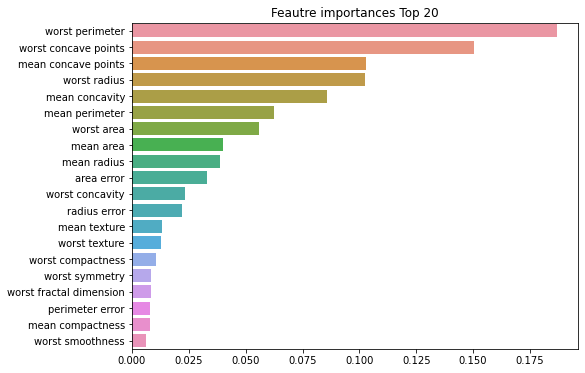

In [339]:
#피처별 중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_ #넘파이 형태
ftr_seri = pd.Series(ftr_importances_values, index= cancer.feature_names)
ftr_top20 = ftr_seri.sort_values(ascending= False)[:20]

plt.figure(figsize=(8,6)) #시본을 사용하더라도  plt.으로 조절
plt.title('Feautre importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [ ]:
#부스팅 : AdaBoost / Gradient Boost

'GBM(Gradient Boostion Machine)'

In [340]:
#GBM(Gradient Boostion Machine) 실습 --- 그냥 GBM은 eval 검증이 없네?
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

cancer_df = pd.DataFrame(cancer.data , columns = cancer.feature_names)
X= cancer_df
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size= 0.2, random_state=0)

start = time.time() #시간 측정 시작

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
acc = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(acc))
print('GMB 수행시간: {0:.1f}'.format(time.time()-start))

GBM 정확도: 0.9649
GMB 수행시간: 0.7


In [164]:
#GBM : XGBoost / LightGBM

In [341]:
#XGBoost -파이썬 래퍼
import xgboost
print(xgboost.__version__)

1.7.2


In [527]:
import xgboost as xgb #파이썬 래퍼의 클래스
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target
#dataset.target_names

cancer_df= pd.DataFrame(features, columns =dataset.feature_names)
cancer_df['target'] = labels
cancer_df[10:20]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,0
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,0
12,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.17670,0.3176,0.10230,0
13,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287,0
14,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,...,32.01,108.8,697.7,0.1651,0.7725,0.6943,0.22080,0.3596,0.14310,0
15,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,...,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.17120,0.4218,0.13410,0
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,30.88,123.4,1138.0,0.1464,0.1871,0.2914,0.16090,0.3029,0.08216,0
17,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,31.48,136.8,1315.0,0.1789,0.4233,0.4784,0.20730,0.3706,0.11420,0
18,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.23880,0.2768,0.07615,0
19,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.7,711.2,0.1440,0.1773,0.2390,0.12880,0.2977,0.07259,1


In [343]:
print(dataset.target_names)
#pd.unique(cancer_df['target'])
print(cancer_df['target'].value_counts() )

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [528]:
X_features = cancer_df.iloc[:, :-1] #마지막에서 두 번째까지 쭈욱
y_label = cancer_df.iloc[:, -1]  # == [:, :-2:-1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

#위에서 만든 train 두 데이터를 다시 쪼개서 90%는 학습, 10%는 검증용으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [345]:
#XGBoost는 데이터셋을 DMatrix로 변환하여 사용 -> 3가지 데이터
dtr = xgb.DMatrix(data=X_tr, label=y_tr) #학습용 
dval = xgb.DMatrix(data=X_val, label=y_val) #검증, 평가용
dtest = xgb.DMatrix(data=X_test, label=y_test) #테스트용

In [346]:
#하이퍼 파라미터는 주로 딕셔너리 형태로
params = {'max_depth': 3,
         'eta': 0.05, #XGBClassifier 사용할 경우 learning_rate임.
         'objective': 'binary:logistic', #목적함수는 0,1이므로 이진 로지스틱
         'eval_metric': 'logloss' #오류 함수의 평가 성능 지표는 logloss. 학습 반복 시 매번 출력
         }
num_rounds =400 #출력 종료

In [347]:
eval_list = [(dtr, 'train'),(dval,'eval')] #학습용은 생략해도 무방
xgb_model = xgb.train(params = params, dtrain= dtr, num_boost_round = num_rounds, 
                     early_stopping_rounds= 50, evals= eval_list) #num_boost_round == n_estimators 트리개수. ※400줄 출력하고 끝남
'''126번째에서 가장 낮은 값이 나왔고 이후 50번까지도 이를 이기지 못함 / train-logloss가 전보다 무조건 낮아지는 이유는 부스팅 특성상 
다음 트리로 넘어갈 때마다 편차를 계속해서 낮추기 떄문,,같은데?'''

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

[170]	train-logloss:0.01312	eval-logloss:0.26133
[171]	train-logloss:0.01304	eval-logloss:0.26148
[172]	train-logloss:0.01297	eval-logloss:0.26157
[173]	train-logloss:0.01285	eval-logloss:0.26253
[174]	train-logloss:0.01278	eval-logloss:0.26229
[175]	train-logloss:0.01267	eval-logloss:0.26086
[176]	train-logloss:0.01258	eval-logloss:0.26103


'126번째에서 가장 낮은 값이 나왔고 이후 50번까지도 이를 이기지 못함 / train-logloss가 전보다 무조건 낮아지는 이유는 부스팅 특성상 \n다음 트리로 넘어갈 때마다 편차를 계속해서 낮추기 떄문,,같은데?'

In [348]:
#결괏값 10개만 예측
""" XGBoost는 예측값이 결과값이 아닌 확률로 나타나므로 0.5이상이면 1, 미만이면 0으로 판단하는 로직을 세우면 됨"""
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10], 3))

#0.5보다 크면 1, """
preds = [1 if x> 0.5 else 0 for x in pred_probs] # for문 리스트 컴프리헨션 --> append가 자동이네
pr = list(map(lambda x: 1 if x>0.5 else 0, pred_probs[:10])) # 람다
pr

[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]


[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

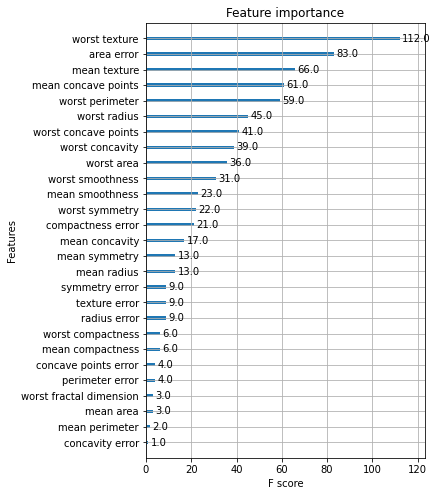

In [349]:
#xgboost에서 피처 중요도는 그래프로만 나타낼 수 있는..듯?
from sklearn.tree import export_graphviz
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,8))
plot_importance(xgb_model, ax=ax)
plt.show()

In [264]:
# XGBoost - 사이킷런 래퍼
""" 하이퍼파라미터 변경내용
eta -> learning_rate
sub_sample -> subsample
lambda -> reg_lambda
alpha -> reg_alpha
"""

'\neta -> learning_rate\nsub_sample -> subsample\nlambda -> reg_lambda\nalpha -> reg_alpha\n'

In [529]:
from xgboost import XGBClassifier #사이킷런 래퍼의 클래스
# Warning 메시지 없애기 위해 eval_metric값을 XGBClassifier생성인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric= 'logloss') #사이킷런에선 n_estimators
xgb_wrapper.fit(X_train, y_train, verbose= True)
preds = xgb_wrapper.predict(X_test)
proba = xgb_wrapper.predict_proba(X_test)[:,1] #타겟값 0,1 중 두번째열인 양성 확률만
"""검증데이터 없이 XGBoost가 가능"""

'검증데이터 없이 XGBoost가 가능'

In [533]:
#오차행렬
"""파이썬 래퍼보다 좋게 나온 이유는 가뜩이나 데이터가 적은데 검증 데이터를 따로 분리하지 않아 학습데이터 증가로."""
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds) 

array([[34,  3],
       [ 1, 76]], dtype=int64)

In [357]:
#위 데이터에 조기중단 추가. 조기중단은 검증 데이터 .val 로 판정
"""필요 정보(모두 fit에)
조기중단 횟수 = early_stopping_round
조기중단 평가지표 = eval_metric
성능 평가를 수행할 데이터셋 = eval_set {파이썬 래퍼와 달리 문자열 없이 쌍으로 입력}
"""
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate =0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss",
               eval_set=evals, verbose=True)       #검증시 자동 출력

ws50_preds = xgb_wrapper.predict(X_test)
ws50_probas = xgb_wrapper.predict_proba(X_test)[:, 1] #출력 씹힘

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

정확도: 0.956


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

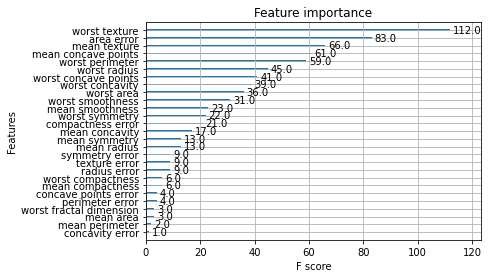

In [453]:
acc = accuracy_score(y_test, ws50_preds)
print('정확도: {0:.3f}'.format(acc))
#plot_importance(xgb_wrapper) #사이킷런에서도 피처별 중요도 시각화 가능

In [304]:
#LightGBM
"""245p - GBM과 같은 일반 트리가 균형중심분할로, 한 쪽의 깊이에 치우치지 않도록
대칭적으로 최대한 균형 잡힌 트리를 만들어 시간이 오래걸렸다면, LightGBM은 리프 중심 분할 방식으로 
균형을 맞추지 않고 최대 손실값을 가지는 리프 노드를 계속 분할하면서 예측 오류를 줄임 -> max_depth가 매우 깊고 과적합 단점"""

'245p - GBM과 같은 일반 트리가 균형중심분할로, 한 쪽의 깊이에 치우치지 않도록\n대칭적으로 최대한 균형 잡힌 트리를 만들어 시간이 오래걸렸다면, LightGBM은 리프 중심 분할 방식으로 \n균형을 맞추지 않고 최대 손실값을 가지는 리프 노드를 계속 분할하면서 예측 오류를 줄임 '

In [452]:
#LightGBM - 사이킷런 래퍼
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
cancer_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
cancer_df['target'] = dataset.target

X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size =0.1 , random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators= 400, learning_rate = 0.05)
evals = [(X_tr, y_tr), (X_val, y_val)] #학습쌍, 검증쌍

lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds= 50, eval_metric='logloss', eval_set= evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
probas = lgbm_wrapper.predict_proba(X_test)[:, 1]
print('정확도:', accuracy_score(y_test, preds))

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

In [362]:
#피처 중요도 xgboost와 동일

In [363]:
#XGBoost, LightGBM 실습

In [2]:
#XGBoost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv("train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [4]:
cust_df.info() #컬럼이 너무 많아 상세히 나오지 않음
#cust_df['ID'].dtype 과 type(cust_df['ID']) 은 다름

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


pandas.core.series.Series

In [387]:
cust_df['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [394]:
cust_df.count() #컬럼 선택 안 해주면 싹 다 나옴

ID                         76020
var3                       76020
var15                      76020
imp_ent_var16_ult1         76020
imp_op_var39_comer_ult1    76020
                           ...  
saldo_medio_var44_hace3    76020
saldo_medio_var44_ult1     76020
saldo_medio_var44_ult3     76020
var38                      76020
TARGET                     76020
Length: 371, dtype: int64

In [395]:
unsatised_cnt = cust_df[cust_df["TARGET"] == 1].TARGET.count() #컬럼을 지정해줘야 한 줄만 count 돼
#unsatised_cnt = cust_df[cust_df["TARGET"] == 1]['TARGET'].count() #위와 ==
print('Unsatised 비율은 {0:.2f}'.format(unsatised_cnt/cust_df.TARGET.count()))


Unsatised 비율은 0.04


In [413]:
cust_df.describe() #분포 -> var3에서 -99999가 나옴.

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,2.716483,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,9.447971,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [462]:
cust_df.isnull().sum() #널값은 없는듯
cust_df['var3'].value_counts()[:10] #var3의 값을 조사해본 결과 -99999는 null값 혹은 특정 예외값을 대체한 것으로 추정.
cust_df['var3'].replace(-999999, 2, inplace= True) #-999999는 var3의 mean인 2로 대체
cust_df.drop('ID', axis=1, inplace=True) #단순 식별자 컬럼 드랍

X_features = cust_df.iloc[:, :-1]
y_label = cust_df.iloc[:, -1]
print('피처데이터 세트 쉐입', X_features.shape)

피처데이터 세트 쉐입 (76020, 369)


In [468]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label , test_size=0.2, random_state=0)

print('학습셋 쉐입:{0}, 테스트셋 쉐입:{1}'.format(X_train.shape, X_test.shape))

y_train_cnt = y_train.count()
y_test_cnt = y_test.count()
print('타겟 학습셋 데이터 비율\n',y_train.value_counts()/y_train_cnt) # y중 0의 비율, 1의 비율
print('\n 타겟 테스트셋 데이터 비율\n', y_test.value_counts()/y_test_cnt)
#타겟의 학습, 테스트 세트의 unsatised의 비율은 원본과 비슷하게 0.04정도 나옴

학습셋 쉐입:(60816, 369), 테스트셋 쉐입:(15204, 369)
타겟 학습셋 데이터 비율
 0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 타겟 테스트셋 데이터 비율
 0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [470]:
#학습 데이터를 학습과 훈련 데이터로 분할
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
59689,2,24,0.0,0.0,335.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
61395,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,148866.120000
31100,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76315.500000
38633,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123168.390000
56184,2,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97748.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178791.510000
59495,2,31,0.0,60.0,60.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101637.660000
22295,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55695.960000
49446,2,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,688561.830000


In [465]:
#하이퍼 파라미터 튜닝과 모델 학습, ROC AUC 평가. {대부분이 만족이고 극히 일부만 불만족일 것이기에 정확도보다는 ROC곡선으로.}
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators= 500, learning_rate=0.05, random_state= 156)

#성능 평가 지표는 'auc'로 하지만 'logloss'도 큰 차이 없음
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric='auc', eval_set=[(X_tr,y_tr), (X_val, y_val)])

#y_test데이터는 0,1의 값이지만 predict_proba는 0.9843같은 확률값임. 만약 그냥 predict로 예측 평가했다면 틀린 경우 1이 차이나게 됨.
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1]) 
print("ROC AUC: {0:.4f}".format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.82347	validation_1-auc:0.80523
[2]	validation_0-auc:0.83178	validation_1-auc:0.81097
[3]	validation_0-auc:0.83401	validation_1-auc:0.81091
[4]	validation_0-auc:0.83443	validation_1-auc:0.81040
[5]	validation_0-auc:0.83570	validation_1-auc:0.81089
[6]	validation_0-auc:0.83597	validation_1-auc:0.81057
[7]	validation_0-auc:0.83643	validation_1-auc:0.81082
[8]	validation_0-auc:0.83682	validation_1-auc:0.81147
[9]	validation_0-auc:0.83769	validation_1-auc:0.81188
[10]	validation_0-auc:0.83770	validation_1-auc:0.81163
[11]	validation_0-auc:0.83911	validation_1-auc:0.81355


KeyboardInterrupt: 

In [ ]:
#!pip install hyperopt

In [441]:
"""
#HyperOpt를 이용해 베이지안 최적화 기반으로 하이퍼 파라미터 튜닝을 수행

from hyperopt import hp

#max_depth는 5~15까지 1간격, ,, / colsample_bytree는 0.5~0.95 사이를 정규 분포된 값으로 ,,,
xgb_search= {'max_depth': hp.quniform('max_depth', 5, 15, 1),
            'min_child_weight': hp.quniform('min_child_weight', 1, 6 ,1),
            'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
            'learning_rate': hp.uniform('learning_rate', 0.01, 0.2) }
#272p 베이지안은 공부 안 해서 패스.

In [466]:
#LightGBM - XGBoost에 비해 빠르고 원-핫 인코딩 없이도 카테고리형 피처를 최적으로
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set= eval_set)
 #검증을 모두 끝낸 후에 그걸 토대로 roc_auc_score를 계산하는듯?
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print("ROC AUC:", lgbm_roc_score)

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc: 0.823733	valid_1's binary_logloss: 0.141592
[9]	training's a

[67]	training's auc: 0.923991	training's binary_logloss: 0.105977	valid_1's auc: 0.831669	valid_1's binary_logloss: 0.135537
[68]	training's auc: 0.924656	training's binary_logloss: 0.105802	valid_1's auc: 0.831775	valid_1's binary_logloss: 0.135525
[69]	training's auc: 0.925273	training's binary_logloss: 0.105548	valid_1's auc: 0.831952	valid_1's binary_logloss: 0.135527
[70]	training's auc: 0.925899	training's binary_logloss: 0.105314	valid_1's auc: 0.831659	valid_1's binary_logloss: 0.135611
[71]	training's auc: 0.926827	training's binary_logloss: 0.105054	valid_1's auc: 0.831626	valid_1's binary_logloss: 0.135621
[72]	training's auc: 0.927861	training's binary_logloss: 0.104712	valid_1's auc: 0.831612	valid_1's binary_logloss: 0.135665
[73]	training's auc: 0.928078	training's binary_logloss: 0.104537	valid_1's auc: 0.831395	valid_1's binary_logloss: 0.135709
[74]	training's auc: 0.928329	training's binary_logloss: 0.104353	valid_1's auc: 0.831106	valid_1's binary_logloss: 0.135773


[138]	training's auc: 0.946832	training's binary_logloss: 0.0929083	valid_1's auc: 0.828907	valid_1's binary_logloss: 0.137476
[139]	training's auc: 0.947105	training's binary_logloss: 0.0927328	valid_1's auc: 0.829034	valid_1's binary_logloss: 0.137463
[140]	training's auc: 0.94779	training's binary_logloss: 0.0924716	valid_1's auc: 0.829175	valid_1's binary_logloss: 0.137451
[141]	training's auc: 0.948038	training's binary_logloss: 0.0923201	valid_1's auc: 0.829218	valid_1's binary_logloss: 0.137468
[142]	training's auc: 0.948302	training's binary_logloss: 0.0921179	valid_1's auc: 0.829267	valid_1's binary_logloss: 0.137482
ROC AUC: 0.8384286453518205


In [481]:
###lightgbm 에서 피처 중요도 그래프 왜 안 되지? --서치해도 잘 안 나옴
plot_importance(lgbm_clf, ax= ax, max_num_features=20, heigth=0.4)

ValueError: tree must be Booster, XGBModel or dict instance

In [ ]:
#베이지안 건너뜀

In [482]:
#신용카드 사기 데이터 실습
    #극소수의 사기 데이터를 잘 학습시키기 위해 오버샘플링(k 최근접 이웃을 이용)을 위한 SMOTE 패키지 아나콘다로 설치


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [486]:
card_df.info() #널 데이터 없음, 모두 숫자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
#함수로 안 해도 됨
from sklearn.model_selection import train_test_split

#복사 후 불필요한 'time컬럼 삭제 후 반환'
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

#
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
     #stratfied 방식으로 추출하면, y_target 0과 1의 비율을 학습데이터와 동일하게 뽑음 0,1모두 7:3 비율
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size= 0.3, random_state=0, stratify=y_target)
    
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [536]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts() / y_train.shape[0]*100) #shape[0] -> count() 도 가능
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts() / y_test.shape[0] *100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [14]:
# 신용 데이터 로지스틱회귀 후 평가
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_auc_score

lr_clf = LogisticRegression(max_iter=200) #반복 횟수 오래걸려서 줄임
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_proba = lr_clf.predict_proba(X_test)[:,1]

print('정확도', accuracy_score(y_test, lr_pred))
print('정밀도',precision_score(y_test, lr_pred))
print('재현율', recall_score(y_test, lr_pred))
print('roc auc', roc_auc_score(y_test, lr_proba)) # roc곡선만 예측한 확률로 평가 

정확도 0.9991924440855307
정밀도 0.883495145631068
재현율 0.6148648648648649
roc auc 0.9717002042196954


In [547]:
print('오차행렬\n', confusion_matrix(y_test, lr_pred))

오차행렬
 [[85280    15]
 [   57    91]]


In [556]:
#신용 데이터 lightGBM 후 평가
from lightgbm import LGBMClassifier
lgbm_clf1 = LGBMClassifier(n_estimators=500, num_leaves=64, n_jobs= -1, boost_from_average=False)
lgbm_clf1.fit(X_train, y_train)

lgbm_pred = lgbm_clf1.predict(X_test)
lgbm_proba = lgbm_clf1.predict_proba(X_test)[:, 1]

print('정확도', accuracy_score(y_test, lgbm_pred))
print('정밀도',precision_score(y_test, lgbm_pred))
print('재현율', recall_score(y_test, lgbm_pred))
print('roc auc', roc_auc_score(y_test, lgbm_proba))
    #앞선 로지스틱회귀보다는 좋아짐

정확도 0.9995201479348805
정밀도 0.9572649572649573
재현율 0.7567567567567568
roc auc 0.9788386252481451


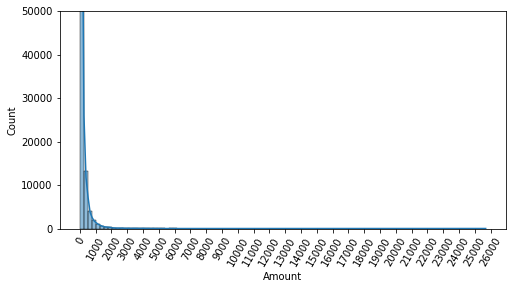

In [572]:
#데이터 분포도 변환 후 재 학습/평가
"""로지스틱회귀는 회귀로, 선형모델의 중요 피처가 정규 분포 형태를 유지하는 것이 좋다. 
그러므로 신용카드 사기를 결정하는데 매우 중요한 'Amount'컬럼 정규화 후 다시 학습"""
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
plt.ylim([0,50000])
sns.histplot(card_df['Amount'], bins=100, kde=True) # bins는 x의 간격
plt.show() 
    # x축이 26000까지 나왔다는 건 26000달러의 거래데이터가 존재한다는 것. 

In [10]:
#정규화 후 로지스틱 
from sklearn.preprocessing import StandardScaler
amount_n = StandardScaler().fit_transform(card_df['Amount'].values.reshape(-1, 1)) # 1열로 만든 후 정규화
card_df.insert(0, 'Amount_Scaled', amount_n) #card_df1 데이터의 0번쨰 컬럼에 'Amount_Scaled'라는 컬럼명의 데이터 amount_n 추가
card_df.drop(['Amount','Time'], axis=1, inplace=True)

KeyError: 'Amount'

In [5]:
card_df # Amount 만 정규화한거고 나머지는 원래 저런 데이터였음

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.350151,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.254117,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,-0.081839,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.313249,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [11]:
X_features = card_df.iloc[:, :-1]
y_target = card_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.3, random_state=0, stratify=y_target)

lr_clf = LogisticRegression(max_iter= 200)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_proba = lr_clf.predict_proba(X_test)[:,1]

print('정확도', accuracy_score(y_test, lr_pred))
print('정밀도',precision_score(y_test, lr_pred))
print('재현율', recall_score(y_test, lr_pred))
print('roc auc', roc_auc_score(y_test, lr_proba)) # roc곡선만 예측한 확률로 평가 

#오히려 저하됨. -> 데이터 분포도가 심한 경우는 로그 변환이 더 좋음

정확도 0.9991573329588147
정밀도 0.8653846153846154
재현율 0.6081081081081081
roc auc 0.9702267805058122


In [19]:
#로그변환 후 재 학습/평가
from sklearn.preprocessing import StandardScaler
amount_n =np.log1p(card_df['Amount']) #정규화와 달리 fit필요없고 1열로 만들 필요도 없음
    #이 밑에는 위에꺼 그대로 복붙
card_df.insert(0, 'Amount_Scaled', amount_n) #card_df1 데이터의 0번쨰 컬럼에 'Amount_Scaled'라는 컬럼명의 데이터 amount_n 추가
card_df.drop(['Amount','Time'], axis=1, inplace=True)

X_features = card_df.iloc[:, :-1]
y_target = card_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.3, random_state=0, stratify=y_target)

lr_clf = LogisticRegression(max_iter= 200)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_proba = lr_clf.predict_proba(X_test)[:,1]

print('정확도', accuracy_score(y_test, lr_pred))
print('정밀도',precision_score(y_test, lr_pred))
print('재현율', recall_score(y_test, lr_pred))
print('roc auc', roc_auc_score(y_test, lr_proba)) # roc곡선만 예측한 확률로 평가 
# 비슷함

KeyError: 'Amount'

In [20]:
"""이상치제거 후 재학습"""

'이상치제거 후 재학습'

<AxesSubplot:>

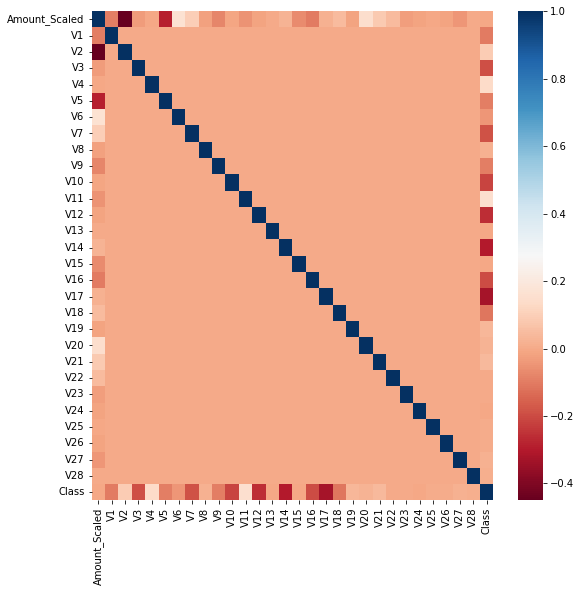

In [22]:
import seaborn as sns
plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [38]:
#타겟인 'Class'와 관련 높은 V14, V17 중 V14컬럼의 이상치 제거 -- 왜 Amount 칼럼은 높게 나오지 않았찌???
import numpy as np 
fraud = card_df[card_df['Class']==1]['V14'] #왜 타겟값이 1인 행만 추출함??
quantile_25 = np.percentile(fraud.values, 25)
quantile_75 = np.percentile(fraud.values, 75)

iqr = quantile_75 - quantile_25   #보통 이 iqr에 1.5를 곱해서 정상 범주라고 봄
lowest_val = quantile_25 - iqr*1.5    
highest_val = quantile_75 + iqr*1.5

outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
outlier_index

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [ ]:
"""이상치 drop 하고, log1p한 상태로 로지스틱회귀, lightgbm해보면 평가 좋아짐"""